# **Problem Statement: Impact of Socioeconomic Factors on Global Health**

# **1. Data Collection**



Gathering data from various sources such as surveys, database, sensors or web scraping.

**Tools:** SQL, APIs, web scraping libraries like beautifulsoup

## **Dataset: Global Health Statistics**

**Source: Kaggle**

**Introduction**

This dataset provides comprehensive statistics on global health, focusing on various diseases, treatments, and outcomes. The data spans multiple countries and years, offering valuable insights for health research. The dataset includes information on the prevalence, incidence, and mortality rates of major diseases, as well as the effectiveness of treatments and healthcare infrastructure.

# **2. Importing Required Libraries**


Importing the necessary libraries according to our dataset

**Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn etc.

In [13]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Data Loading**

Loading the dataset

In [12]:
#use the file module from
from google.colab import files
uploaded = files.upload()

Saving Global_Health_Statistics.csv to Global_Health_Statistics (2).csv


In [14]:
# Load the dataset
df = pd.read_csv("Global_Health_Statistics.csv")

# Display the first few rows of the dataset
df.head()

,Country,Year,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Recovery Rate (%),Improvement in 5 Years (%)
0,Italy,2013,Respiratory,0.95,1.55,8.42,0-18,Male,471007,57.74,Medication,21064,91.82,2.16
1,France,2002,Parasitic,12.46,8.63,8.75,61+,Male,634318,89.21,Surgery,47851,76.65,4.82
2,Turkey,2015,Genetic,0.91,2.35,6.22,36-60,Male,154878,56.41,27834,Yes,98.55,5.81
3,Indonesia,2011,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,85.20,144,Yes,67.35,2.22
4,Italy,2013,Genetic,0.83,13.59,7.01,61+,Male,472908,67.00,Medication,8908,50.06,6.93


In [ ]:
#display the last five rows of the dataset
df.tail()

,Country,Year,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Recovery Rate (%),Improvement in 5 Years (%)
994,Japan,2005,Parasitic,1.29,10.07,7.14,0-18,Male,862148,55.00,Medication,37905,92.79,9.93
995,Japan,2008,Chronic,8.20,8.64,1.36,36-60,Male,318782,89.16,Therapy,6463,95.29,5.35
996,South Africa,2012,Autoimmune,8.02,5.90,8.11,61+,Other,850203,92.27,Medication,33238,67.03,0.97
997,Mexico,2001,Chronic,13.35,11.26,3.42,19-35,Male,764642,80.88,Vaccination,14751,65.89,4.45
998,Turkey,2022,Autoimmune,16.83,6.54,0.71,0-18,Other,456036,56.29,Therapy,9638,55.43,0.94


In [ ]:
print(df.to_string())

          Country  Year Disease Category  Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  Gender  Population Affected  Healthcare Access (%) Treatment Type Average Treatment Cost (USD)  Recovery Rate (%)  Improvement in 5 Years (%)
0           Italy  2013      Respiratory                 0.95                1.55                8.42      0-18    Male               471007                  57.74     Medication                        21064              91.82                        2.16
1          France  2002        Parasitic                12.46                8.63                8.75       61+    Male               634318                  89.21        Surgery                        47851              76.65                        4.82
2          Turkey  2015          Genetic                 0.91                2.35                6.22     36-60    Male               154878                  56.41          27834                          Yes              98.55         

# **4. Data Cleaning**

Data cleaning is the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to ensure its accuracy and quality for analysis.

**Tools:** Pandas, NumPy

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
print(df.columns)

Missing Values:
 Country                         0
Year                            0
Disease Category                0
Prevalence Rate (%)             0
Incidence Rate (%)              0
Mortality Rate (%)              0
Age Group                       0
Gender                          0
Population Affected             0
Healthcare Access (%)           0
Treatment Type                  0
Average Treatment Cost (USD)    0
Recovery Rate (%)               0
Improvement in 5 Years (%)      0
dtype: int64
Index(['Country', 'Year', 'Disease Category', 'Prevalence Rate (%)',
       'Incidence Rate (%)', 'Mortality Rate (%)', 'Age Group', 'Gender',
       'Population Affected', 'Healthcare Access (%)', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Recovery Rate (%)',
       'Improvement in 5 Years (%)'],
      dtype='object')


In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Define numerical columns
numerical_cols = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
                  'Population Affected', 'Healthcare Access (%)',
                  'Average Treatment Cost (USD)', 'Recovery Rate (%)',
                  'Improvement in 5 Years (%)']

# Check if all numerical columns exist in the DataFrame
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]

# Ensure numerical columns have valid numeric values
df[existing_numerical_cols] = df[existing_numerical_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Normalize numerical columns
scaler = StandardScaler()
df[existing_numerical_cols] = scaler.fit_transform(df[existing_numerical_cols])


In [ ]:
#checking no of rows and cols
df.shape

(999, 14)

In [ ]:
#checking max rows:
print(pd.options.display.max_rows>=400)

False


In [ ]:
#checks with col name whether it contains any null value, count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       999 non-null    object 
 1   Year                          999 non-null    int64  
 2   Disease Category              999 non-null    object 
 3   Prevalence Rate (%)           999 non-null    float64
 4   Incidence Rate (%)            999 non-null    float64
 5   Mortality Rate (%)            999 non-null    float64
 6   Age Group                     999 non-null    object 
 7   Gender                        999 non-null    object 
 8   Population Affected           999 non-null    float64
 9   Healthcare Access (%)         999 non-null    float64
 10  Treatment Type                999 non-null    object 
 11  Average Treatment Cost (USD)  999 non-null    float64
 12  Recovery Rate (%)             999 non-null    float64
 13  Impro

In [ ]:
#accessing single cols in df
print(df['Age Group'])

0       0-18
1        61+
2      36-60
3       0-18
4        61+
       ...  
994     0-18
995    36-60
996      61+
997    19-35
998     0-18
Name: Age Group, Length: 999, dtype: object


In [ ]:
#accessing single cols in df
print(df['Prevalence Rate (%)'])

0     -1.660371
1      0.373833
2     -1.667441
3     -1.001155
4     -1.681579
         ...   
994   -1.600282
995   -0.379052
996   -0.410864
997    0.531126
998    1.146160
Name: Prevalence Rate (%), Length: 999, dtype: float64


In [ ]:
#accessing multiple cols in df
print(df[['Age Group', 'Prevalence Rate (%)']])

    Age Group  Prevalence Rate (%)
0        0-18            -1.660371
1         61+             0.373833
2       36-60            -1.667441
3        0-18            -1.001155
4         61+            -1.681579
..        ...                  ...
994      0-18            -1.600282
995     36-60            -0.379052
996       61+            -0.410864
997     19-35             0.531126
998      0-18             1.146160

[999 rows x 2 columns]


In [ ]:
#accessing rows by integer index
print(df.iloc[0])

Country                               Italy
Year                                   2013
Disease Category                Respiratory
Prevalence Rate (%)               -1.660371
Incidence Rate (%)                -1.386496
Mortality Rate (%)                 1.235293
Age Group                              0-18
Gender                                 Male
Population Affected               -0.094712
Healthcare Access (%)              -1.16207
Treatment Type                   Medication
Average Treatment Cost (USD)      -0.319393
Recovery Rate (%)                  1.211344
Improvement in 5 Years (%)        -1.071227
Name: 0, dtype: object


In [ ]:
#accesing by level
print(df.loc[0])

Country                               Italy
Year                                   2013
Disease Category                Respiratory
Prevalence Rate (%)               -1.660371
Incidence Rate (%)                -1.386496
Mortality Rate (%)                 1.235293
Age Group                              0-18
Gender                                 Male
Population Affected               -0.094712
Healthcare Access (%)              -1.16207
Treatment Type                   Medication
Average Treatment Cost (USD)      -0.319393
Recovery Rate (%)                  1.211344
Improvement in 5 Years (%)        -1.071227
Name: 0, dtype: object


In [ ]:
#slicing
print(df[0:3]) #access rows 1 to 2

  Country  Year Disease Category  Prevalence Rate (%)  Incidence Rate (%)  \
0   Italy  2013      Respiratory            -1.660371           -1.386496   
1  France  2002        Parasitic             0.373833            0.251723   
2  Turkey  2015          Genetic            -1.667441           -1.201387   

   Mortality Rate (%) Age Group Gender  Population Affected  \
0            1.235293      0-18   Male            -0.094712   
1            1.353472       61+   Male             0.471295   
2            0.447440     36-60   Male            -1.190361   

   Healthcare Access (%) Treatment Type  Average Treatment Cost (USD)  \
0              -1.162070     Medication                     -0.319393   
1               0.959539        Surgery                      1.542107   
2              -1.251735          27834                     -1.783186   

   Recovery Rate (%)  Improvement in 5 Years (%)  
0           1.211344                   -1.071227  
1           0.156397                   -0.1

In [ ]:
#boolean indexing
print(df[df['Healthcare Access (%)']<60.00]) #filters rows where healthcare access> 50

          Country  Year Disease Category  Prevalence Rate (%)  \
0           Italy  2013      Respiratory            -1.660371   
1          France  2002        Parasitic             0.373833   
2          Turkey  2015          Genetic            -1.667441   
3       Indonesia  2011       Autoimmune            -1.001155   
4           Italy  2013          Genetic            -1.681579   
..            ...   ...              ...                  ...   
994         Japan  2005        Parasitic            -1.600282   
995         Japan  2008          Chronic            -0.379052   
996  South Africa  2012       Autoimmune            -0.410864   
997        Mexico  2001          Chronic             0.531126   
998        Turkey  2022       Autoimmune             1.146160   

     Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0             -1.386496            1.235293      0-18   Male   
1              0.251723            1.353472       61+   Male   
2             -1.201387    

# **5. Exploratory Data Analysis (EDA)**

Data Exploration is understanding the structure and characteristics of data.

**Tools**: NumPy, Matplotlib, Seaborn

In [ ]:
# Summary statistics
print("Summary Statistics:\n", df.describe())

# Ensure no missing or non-numeric data in numerical columns
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce').fillna(0)


Summary Statistics:
               Year  Prevalence Rate (%)  Incidence Rate (%)  \
count   999.000000         9.990000e+02        9.990000e+02   
mean   2011.699700         2.827235e-16        3.200643e-17   
std       7.266051         1.000501e+00        1.000501e+00   
min    2000.000000        -1.805293e+00       -1.719694e+00   
25%    2005.000000        -7.979110e-01       -8.577773e-01   
50%    2011.000000         4.334133e-02        1.825154e-03   
75%    2018.000000         8.439449e-01        8.637414e-01   
max    2024.000000         1.706405e+00        1.725658e+00   

       Mortality Rate (%)  Population Affected  Healthcare Access (%)  \
count        9.990000e+02         9.990000e+02           9.990000e+02   
mean        -4.267524e-17         7.823794e-17          -4.569807e-16   
std          1.000501e+00         1.000501e+00           1.000501e+00   
min         -1.744226e+00        -1.716529e+00          -1.683877e+00   
25%         -8.883303e-01        -8.817220e-01

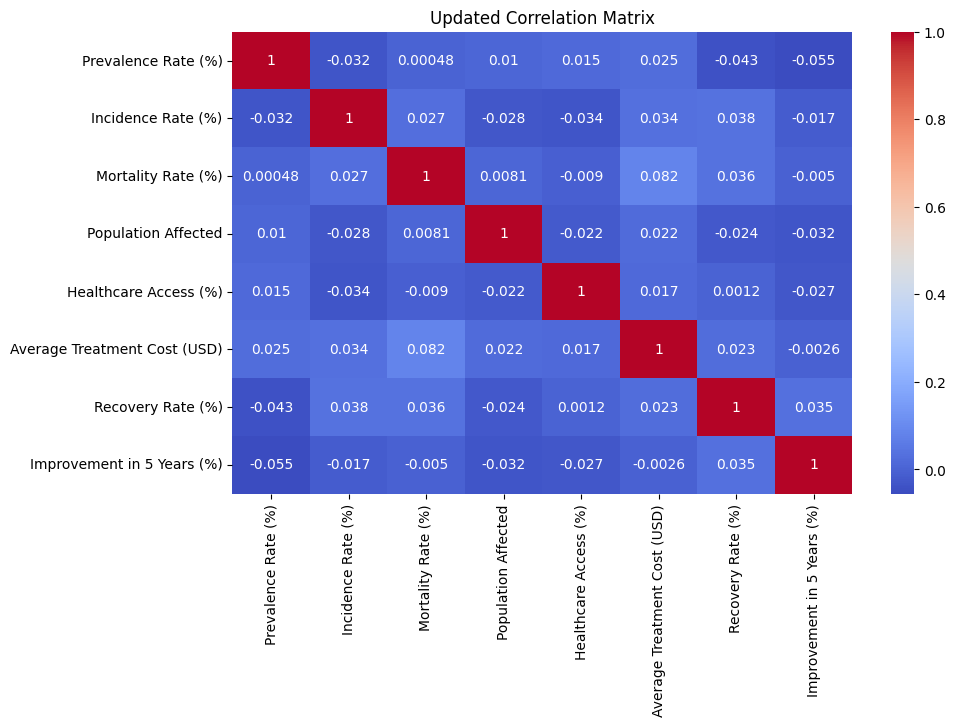

In [ ]:
# Recheck correlation and distributions
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Updated Correlation Matrix")
plt.show()

In [ ]:
# Verify categorical column consistency
# Define categorical columns
categorical_cols = ['Country', 'Disease Category', 'Gender', 'Treatment Type']

# Check and verify each categorical column
for col in categorical_cols:
    if col in df.columns:
        print(f"Unique values in '{col}': {df[col].dropna().unique()}")
    else:
        print(f"Column '{col}' is not found in the dataset.")



Unique values in 'Country': ['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']
Unique values in 'Disease Category': ['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']
Unique values in 'Gender': ['Male' 'Other' 'Female']
Unique values in 'Treatment Type': ['Medication' 'Surgery' '27834' '144' 'Therapy' 'Vaccination']


# **6. Data Visualization**

Data visualization is the graphical representation of data and information using charts, graphs, and maps to make patterns and insights easier to understand.

**Tools:** Matplotlib, Seaborn

**Distribution Bars**

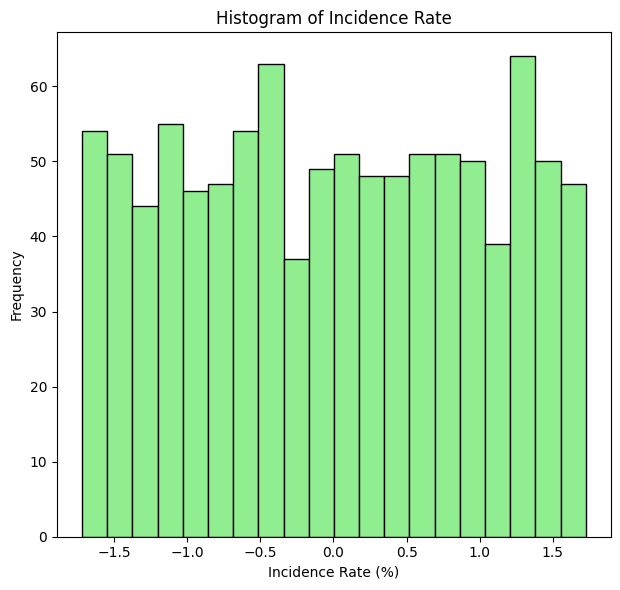

In [ ]:
#histogram
import pandas as pd
import matplotlib.pyplot as plt
# Create histograms for Prevalence Rate and Incidence Rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(df['Incidence Rate (%)'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Incidence Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Incidence Rate')
plt.tight_layout()
plt.show()

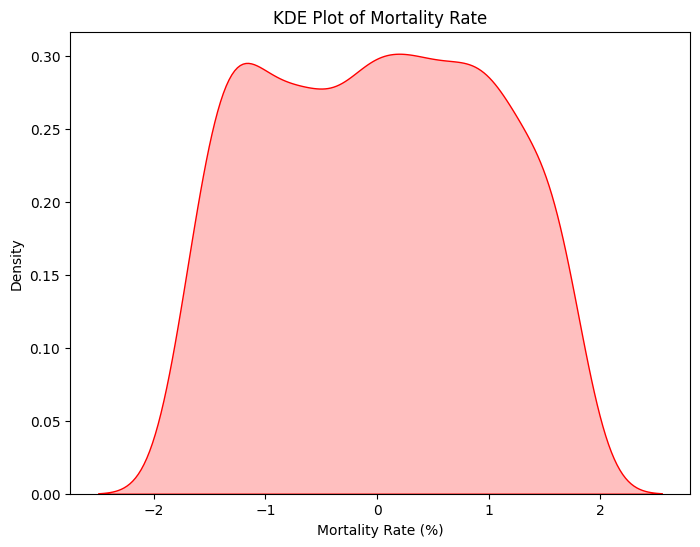

In [ ]:
#KDE plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create KDE plot for Mortality Rate (%)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Mortality Rate (%)'], color='red', fill=True)
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Density')
plt.title('KDE Plot of Mortality Rate')
plt.show()

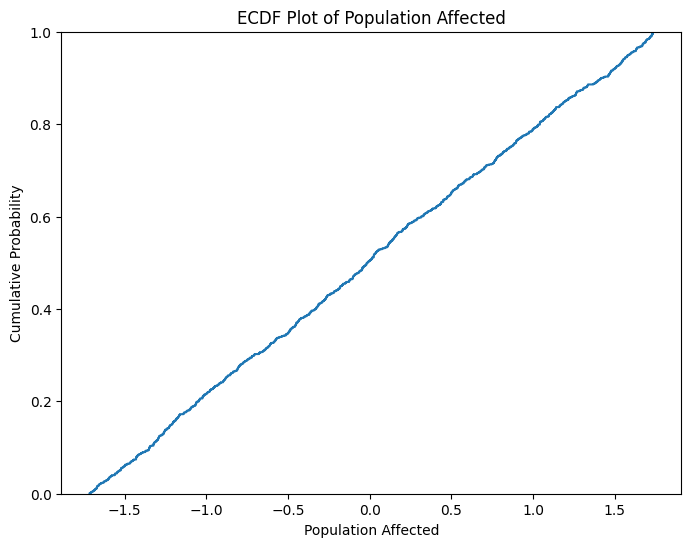

In [ ]:
#ECDF plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create ECDF plot for Population Affected
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=df, x='Population Affected')
plt.xlabel('Population Affected')
plt.ylabel('Cumulative Probability')
plt.title('ECDF Plot of Population Affected')
plt.show()

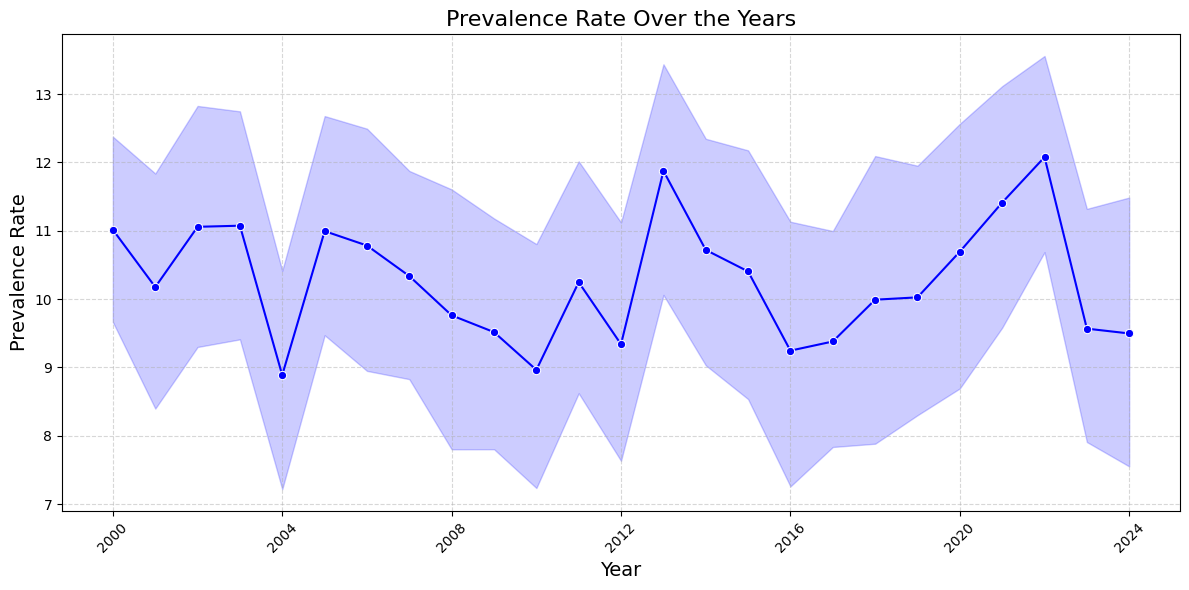

In [ ]:
#rug plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')
# Assuming 'Year' and 'Prevalence Rate' are the column names
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Plotting the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Prevalence Rate (%)', marker='o', color='blue')

# Customizing the plot
plt.title('Prevalence Rate Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Prevalence Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

**Regression Plots**

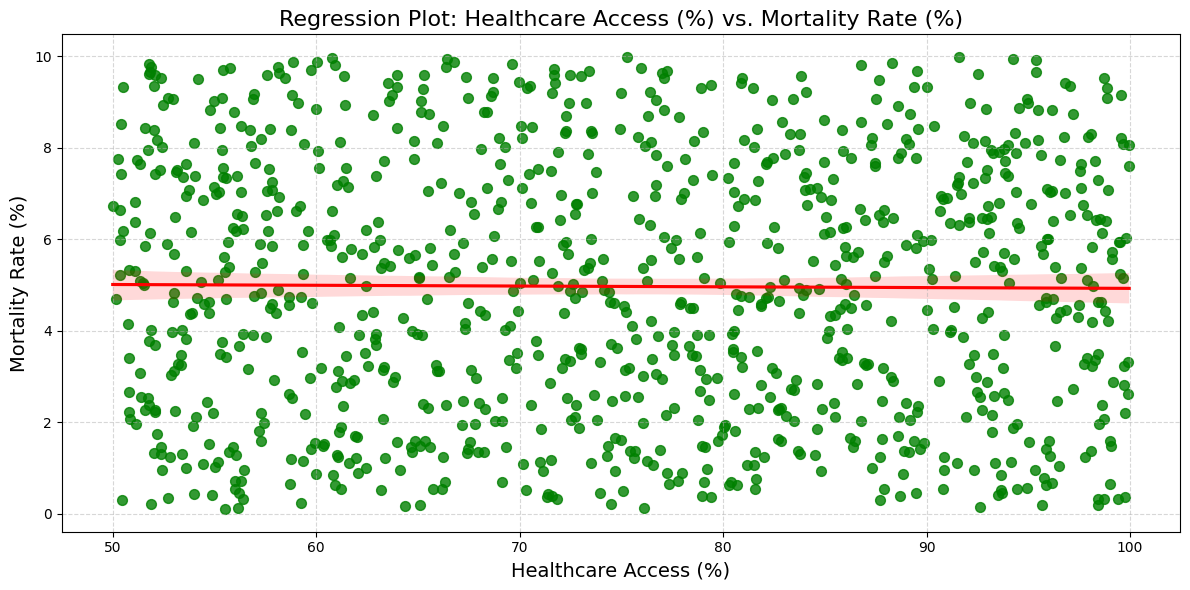

In [ ]:
#regression plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')

# Assuming 'Healthcare Access Score' and 'Mortality Rate' are the column names
x_column = 'Healthcare Access (%)'
y_column = 'Mortality Rate (%)'

# Plotting the regression plot
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x=x_column, y=y_column, color='green', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Customizing the plot
plt.title(f'Regression Plot: {x_column} vs. {y_column}', fontsize=16)
plt.xlabel(x_column, fontsize=14)
plt.ylabel(y_column, fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

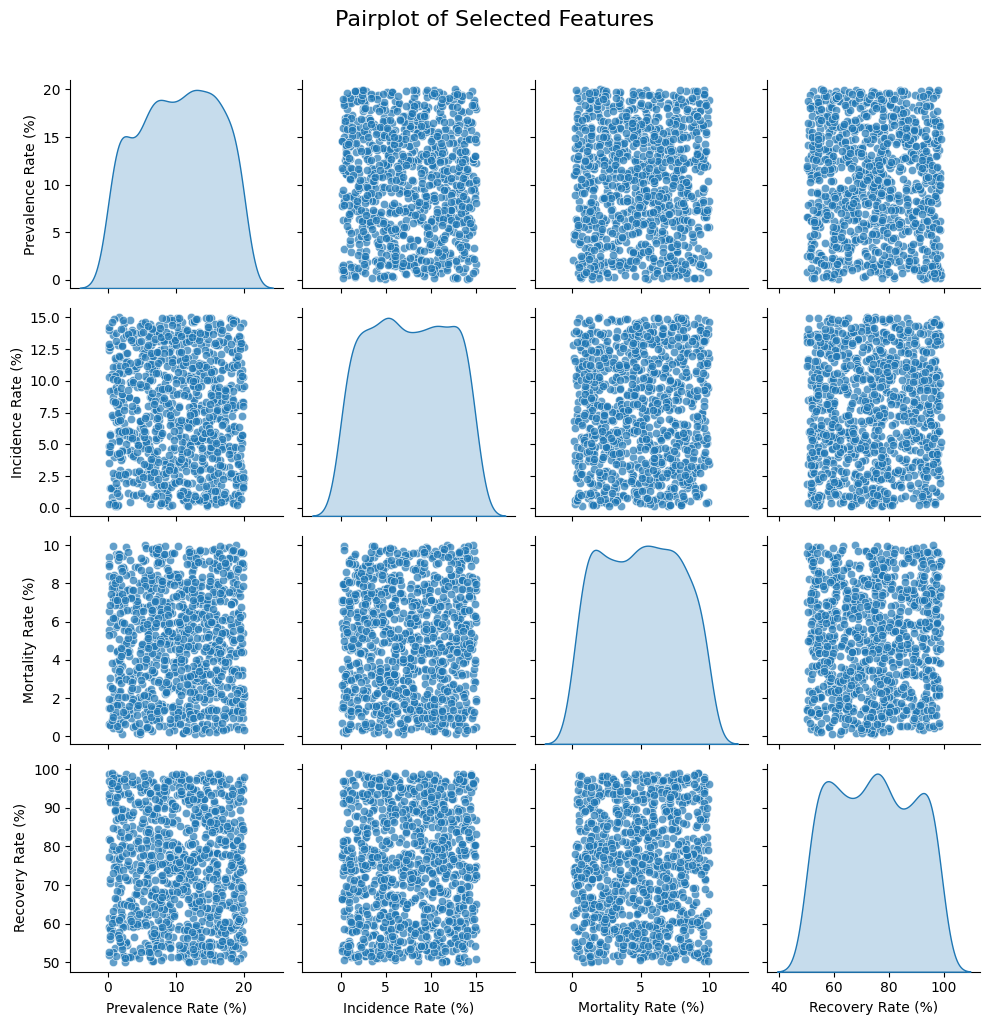

In [ ]:
#pair plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')

# Selecting columns for the pairplot
selected_columns = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Recovery Rate (%)']

# Ensure the selected columns exist in the dataset
pairplot_df = df[selected_columns]

# Creating the pairplot
sns.pairplot(pairplot_df, diag_kind='kde', plot_kws={'alpha': 0.7}, diag_kws={'shade': True})
# Adding a title
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

**Categorical Plots**

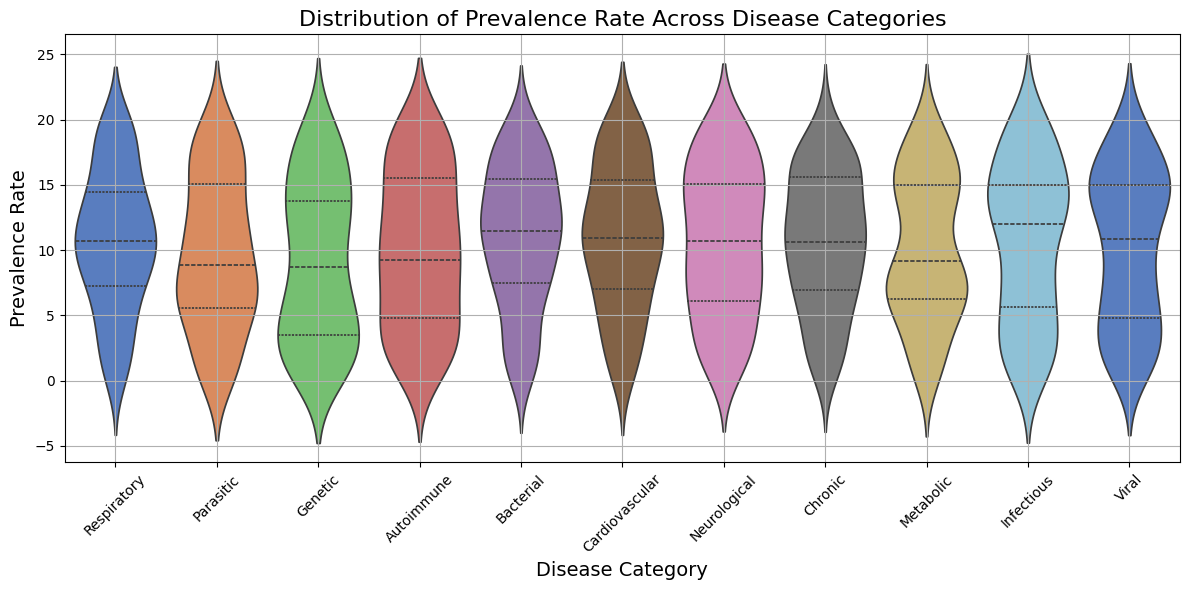

In [ ]:
#violin plot
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')

# Creating the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Disease Category', y='Prevalence Rate (%)', hue='Disease Category', inner='quart', palette='muted', legend=False)

# Customizing the plot
plt.title('Distribution of Prevalence Rate Across Disease Categories', fontsize=16)
plt.xlabel('Disease Category', fontsize=14)
plt.ylabel('Prevalence Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

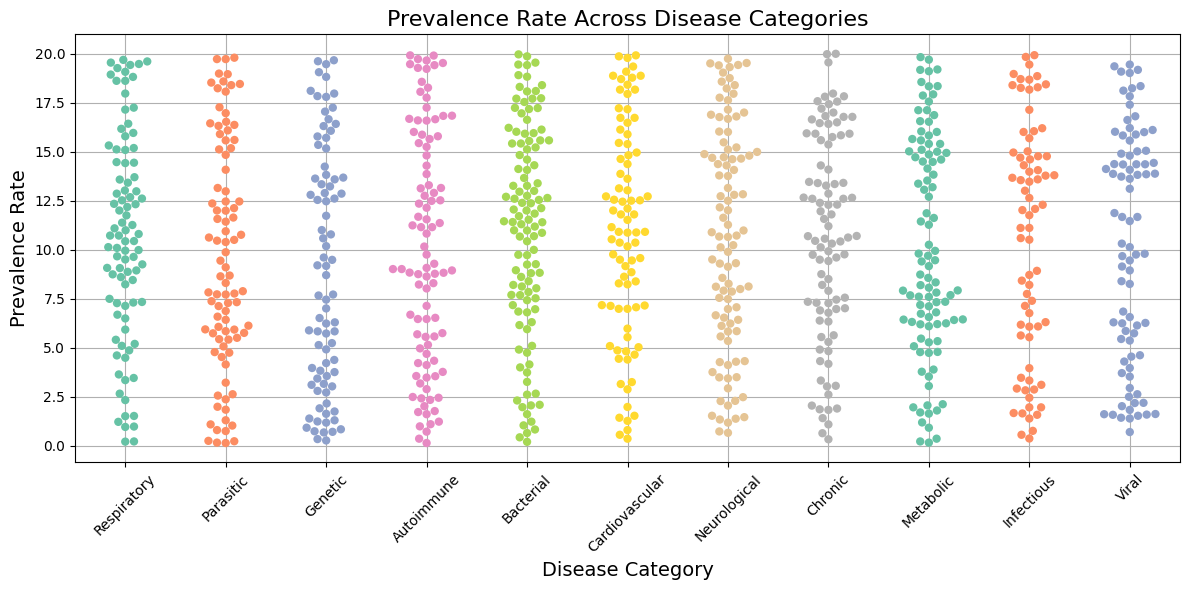

In [ ]:
#swarm plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')

# Create the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Disease Category', y='Prevalence Rate (%)', hue='Disease Category', palette='Set2', size=6)

# Customizing the plot
plt.title('Prevalence Rate Across Disease Categories', fontsize=16)
plt.xlabel('Disease Category', fontsize=14)
plt.ylabel('Prevalence Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Matrix plot**

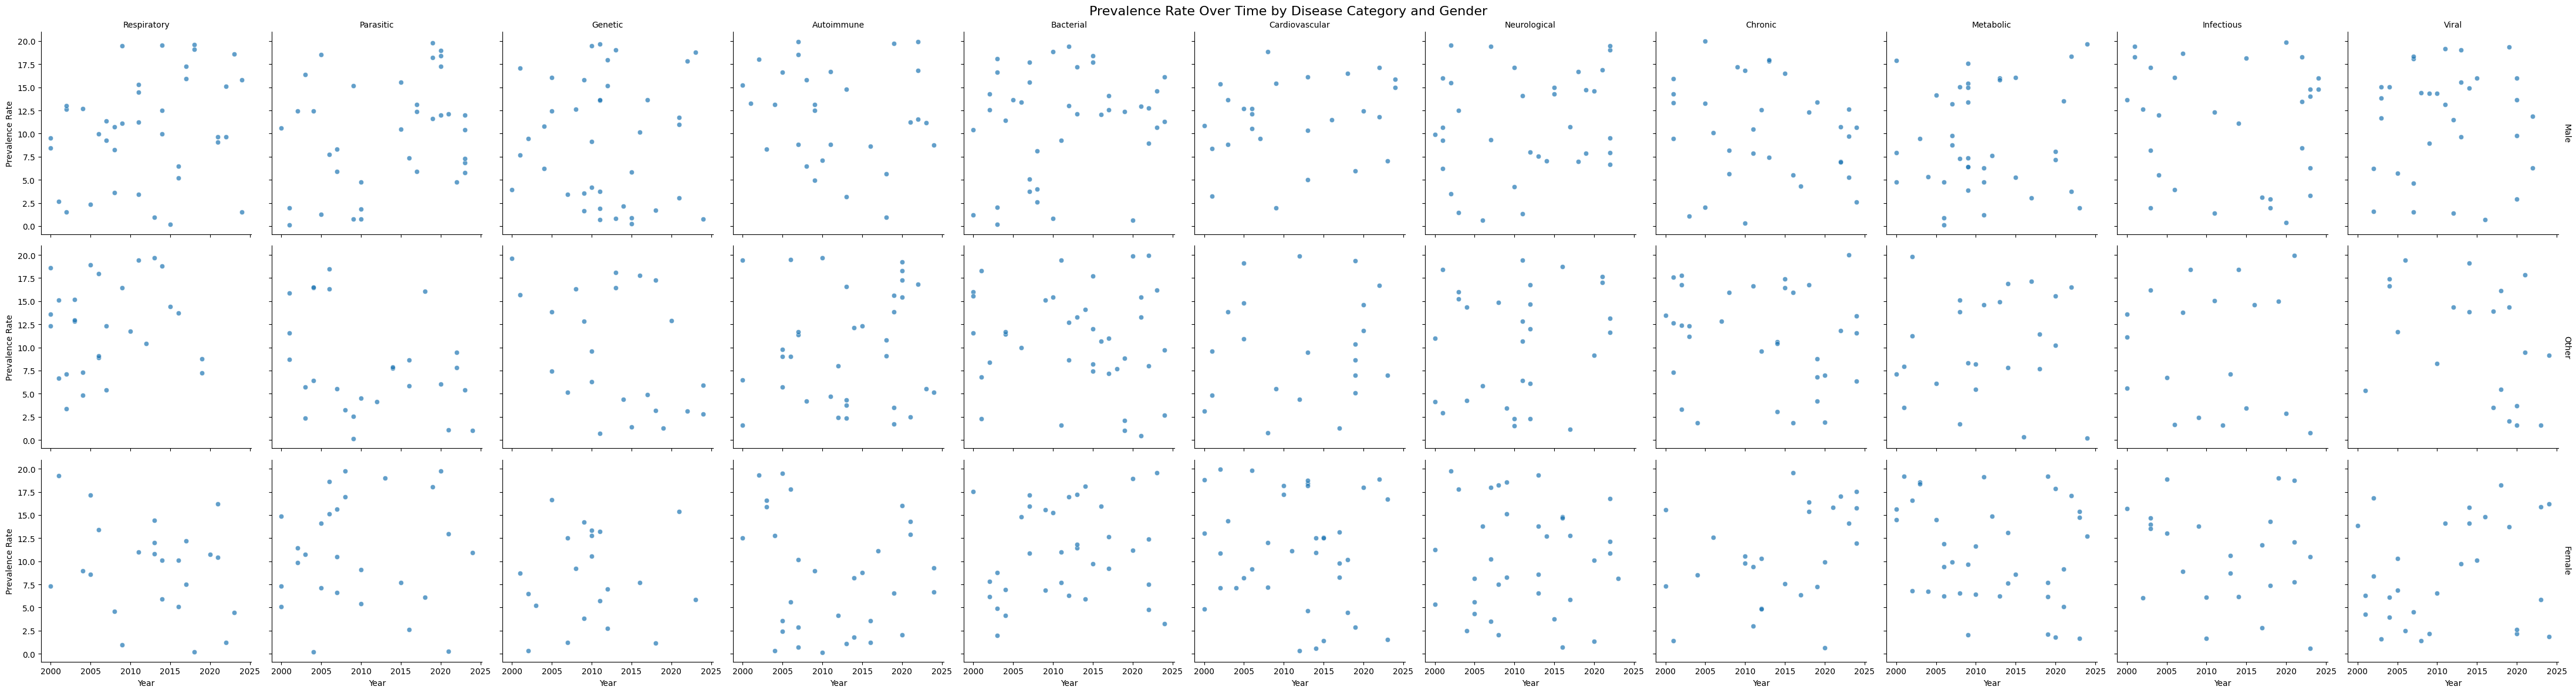

In [ ]:
#cluster map
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')

# Create the FacetGrid
g = sns.FacetGrid(df, col='Disease Category', row='Gender', margin_titles=True, height=4)

# Map the plot on the grid
g.map(sns.scatterplot, 'Year', 'Prevalence Rate (%)', alpha=0.7)

# Add titles and labels
g.set_axis_labels('Year', 'Prevalence Rate')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.fig.suptitle('Prevalence Rate Over Time by Disease Category and Gender', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

**Grid Plots**

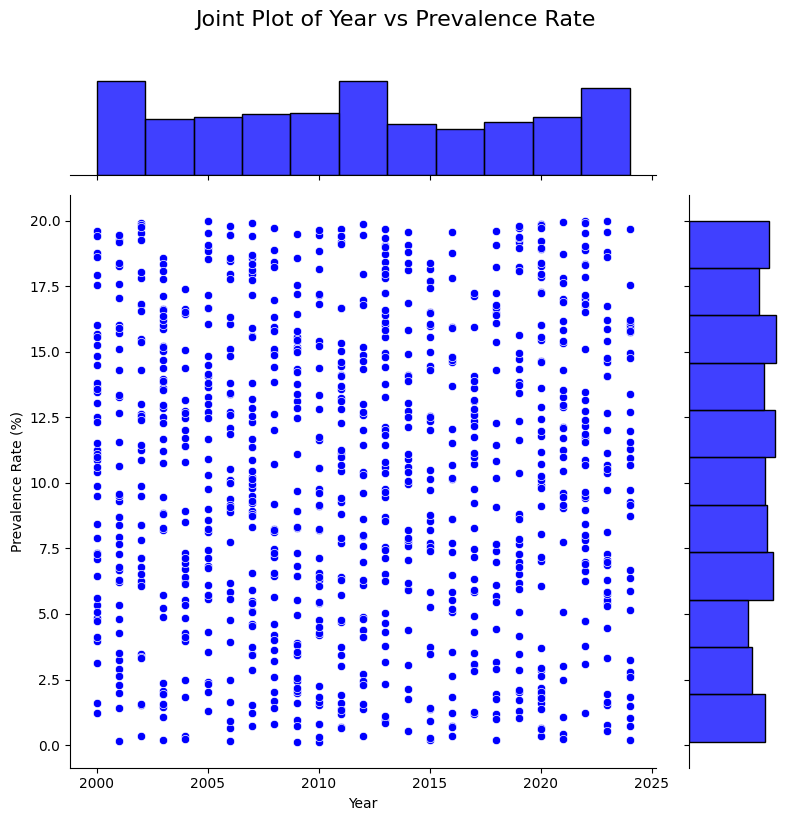

In [ ]:
#joint plot
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the global health dataset
df = pd.read_csv('Global_Health_Statistics.csv')

# Create the joint plot
sns.jointplot(data=df, x='Year', y='Prevalence Rate (%)', kind='scatter', color='blue', height=8)

# Adding a title
plt.suptitle('Joint Plot of Year vs Prevalence Rate', fontsize=16, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

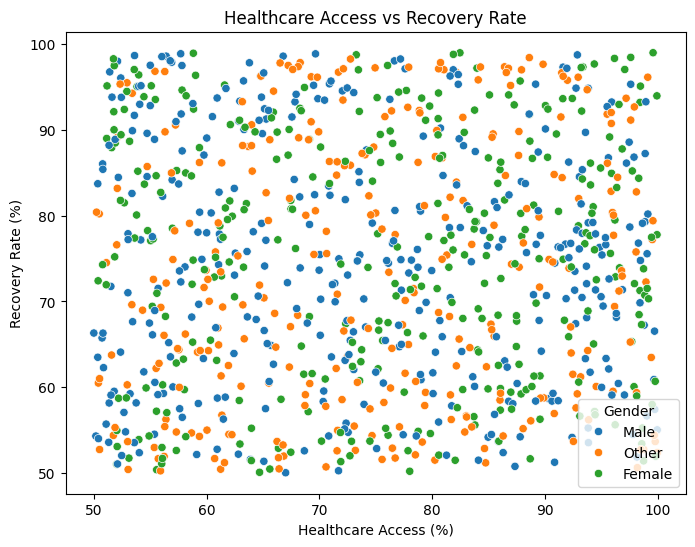

In [ ]:
# Scatter plot for relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Healthcare Access (%)', y='Recovery Rate (%)', hue='Gender')
plt.title("Healthcare Access vs Recovery Rate")
plt.show()

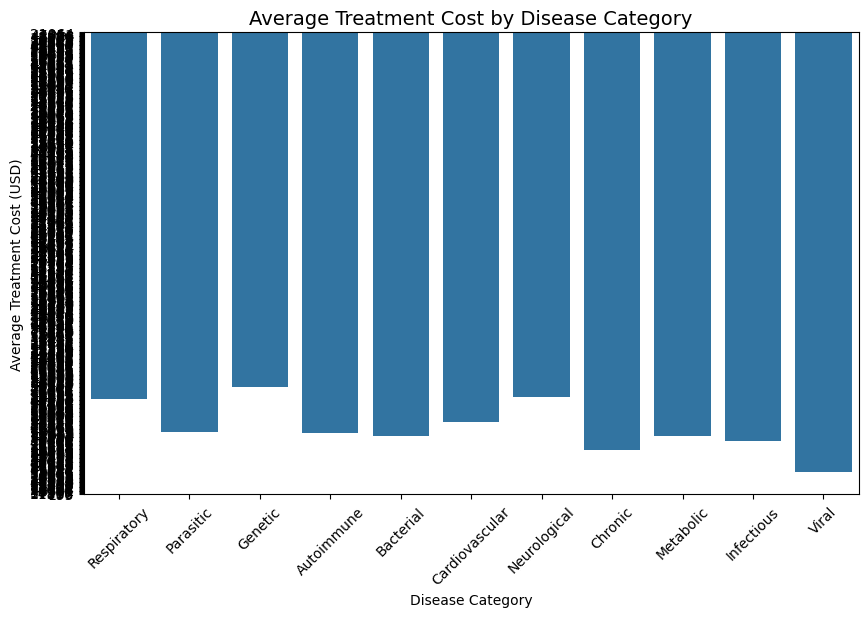

In [ ]:
# Bar plot for average treatment cost by disease category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Disease Category', y='Average Treatment Cost (USD)', errorbar=None)
plt.title("Average Treatment Cost by Disease Category", fontsize=14)
plt.xticks(rotation=45)
plt.show()

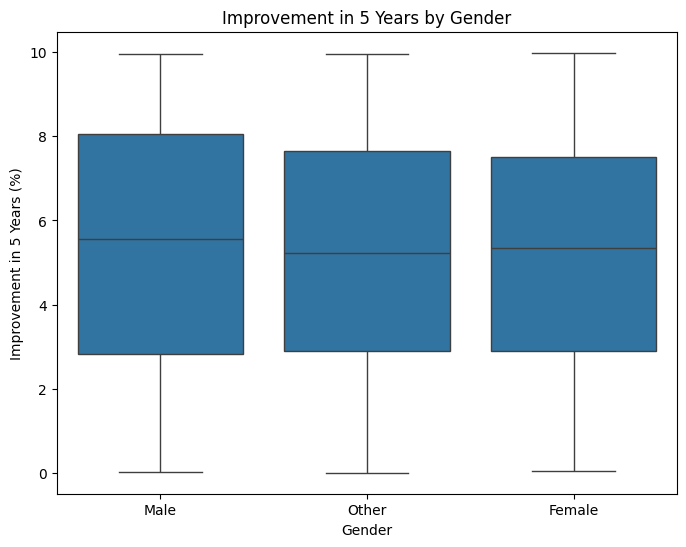

In [ ]:
# Box plot for improvement over 5 years by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Improvement in 5 Years (%)')
plt.title("Improvement in 5 Years by Gender")
plt.show()

# **7. Insights Extraction**

Drawing conclusion from the analysis and presenting insights

**Tools:** Matplotlib, Tableau, PowerBI,

In [ ]:
# Identify the top countries with high recovery rates
top_countries = df.groupby('Country')['Recovery Rate (%)'].mean().sort_values(ascending=False).head(10)
print("Top 10 Countries with Highest Recovery Rates:\n", top_countries)


Top 10 Countries with Highest Recovery Rates:
 Country
Saudi Arabia    0.317136
USA             0.306070
Mexico          0.245896
Italy           0.211856
Indonesia       0.041111
Australia       0.022102
Germany         0.009789
Brazil         -0.001628
Turkey         -0.003575
Japan          -0.014179
Name: Recovery Rate (%), dtype: float64


In [ ]:
# Region-wise comparison of disease prevalence
region_prevalence = df.groupby('Disease Category')['Prevalence Rate (%)'].mean().sort_values(ascending=False)
print("Prevalence Rate by Disease Category:\n", region_prevalence)

Prevalence Rate by Disease Category:
 Disease Category
Bacterial         0.119889
Cardiovascular    0.106487
Respiratory       0.062762
Chronic           0.052255
Neurological      0.047669
Infectious        0.043075
Viral            -0.017352
Metabolic        -0.043597
Autoimmune       -0.051146
Parasitic        -0.118586
Genetic          -0.234705
Name: Prevalence Rate (%), dtype: float64


# ** Workflow of Data Analysis**

**1.Data Cleaning**: The dataset is clean, complete, and normalized, making it ready for robust analysis of global health trends and socioeconomic disparities.


**2.Exploratory Data Analysis**:

**Correlation Analysis**

1. The correlation heatmap highlights relationships between numerical variables, identifying strong positive or negative correlations.
2. For example, variables like Healthcare Access (%), Recovery Rate (%), and Improvement in 5 Years (%) may correlate, revealing patterns in healthcare and health outcomes.

**3.Data Visualizations:**

**Healthcare Access vs. Recovery Rate (Scatter Plot):**
The scatter plot reveals a potential positive relationship between Healthcare Access (%) and Recovery Rate (%), with differences observed across genders, indicating how access disparities may affect recovery outcomes.

**Average Treatment Cost by Disease Category (Bar Plot):**
The bar plot highlights variations in treatment costs across disease categories, showcasing which conditions are most expensive to treat and identifying potential cost disparities.

**Improvement in 5 Years by Gender (Box Plot):**
The box plot illustrates differences in Improvement in 5 Years (%) across genders, revealing potential disparities in long-term health outcomes based on gender.
These visualizations provide valuable insights into healthcare accessibility, cost disparities, and demographic impacts on health outcomes, paving the way for targeted analyses.

**4.Insights Extraction:**

**Top Countries with High Recovery Rates:**
Identifies the top-performing countries in terms of Recovery Rate (%), which can be analyzed for best practices in healthcare systems and treatment strategies.

**Region-wise Disease Prevalence:**
Highlights the Prevalence Rate (%) across disease categories, providing an understanding of which diseases are most widespread globally and where interventions may be prioritized.

These insights uncover critical patterns in recovery performance and disease burden, offering actionable information for policymakers and healthcare stakeholders.







**Conclusion**
      
Overall Insight Conclusion: Socioeconomic factors significantly influence global health outcomes, as observed through recovery rates and disease prevalence across regions. Countries with better healthcare access and higher investment in treatment tend to show higher recovery rates, reflecting the positive impact of robust healthcare systems. The dataset reveals that regions with higher healthcare access, such as Europe and North America, exhibit lower disease prevalence and mortality rates. Conversely, regions like sub-Saharan Africa face higher disease burden and lower recovery rates, largely due to limited healthcare access and resources. The analysis highlights the importance of improving healthcare infrastructure and addressing regional disparities to enhance global health outcomes and reduce disease burden.